In [4]:
import os
import pandas as pd

path = '../../dgym-data/analysis/mpo/'
files = os.listdir(path)
files = [path + f for f in files]

In [17]:
df = pd.concat([pd.read_csv(f, sep='\t') for f in files]).reset_index(drop=True)

In [29]:
from dgym.envs.utility import MultipleUtilityFunction, ClassicUtilityFunction

# create evaluators
docking_utility_function = ClassicUtilityFunction(
    ideal=(9.5, 13),
    acceptable=(9, 13)
)

log_P_utility_function = ClassicUtilityFunction(
    ideal=(0.5, 1.85),
    acceptable=(-0.5, 3.5)
)

log_S_utility_function = ClassicUtilityFunction(
    ideal=(-1, 1),
    acceptable=(-4, 1)
)

composite_utility_function = MultipleUtilityFunction([
    docking_utility_function, log_P_utility_function, log_S_utility_function])

In [37]:
composite_utility_function([[1.0, 2.0, 3.0]], method='average')

ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [19]:
df

,smiles,pIC50,log P,log S
0,N=C(N)N(C(=O)c1nc(C2CC2)n(-c2ccccc2)n1)c1ccc(C...,NaN,3.33837,-5.453795
1,N=C(NC(=O)c1ncc(Br)c(N2CCCC(N)C2)n1)Nc1ccc(Cl)cc1,NaN,2.59667,-3.065063
2,N=C(NC(=O)c1nc(C2CC2)n(-c2ccccc2)n1)Nc1ccc(Cl)cc1,NaN,3.57477,-6.417421
3,N=C(NC(=O)c1ncc(Br)c(N2CCCC(N)C2)n1)Nc1ccc(Br)cc1,NaN,2.70577,-3.189083
4,N=C(N)N(C(=O)c1ncc(Br)c(N2CCCC(N)C2)n1)c1ccc(B...,NaN,2.46937,-3.087431
...,...,...,...,...
314695,CC(NC(=O)c1ccc(CCl)cc1)C(=O)C1CCCCC1,7.454151,3.69310,-4.596833
314696,CC(NC(=O)c1ccc(NN)cc1)C(=O)C1CCCCC1,7.357487,2.23990,-3.181058
314697,C[C@H](NC(=O)c1ccc(CN)cc1)C(=O)N1CCCCC1,7.043625,1.27610,-2.201268
314698,CSc1ccc(C(=O)NC(C)C(=O)C2CCCCC2)cc1,7.254037,3.67620,-4.606163


/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  

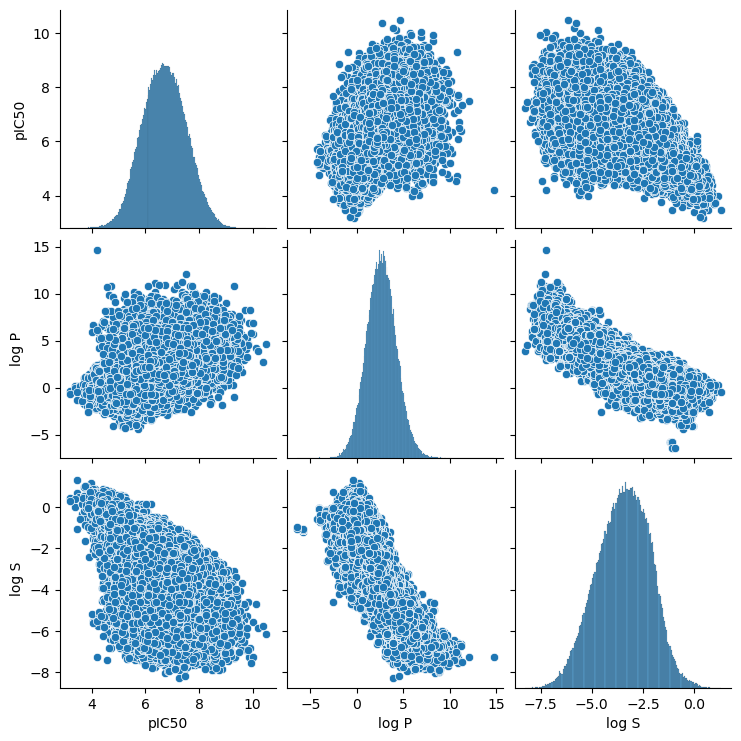

In [18]:
import seaborn as sns

sns.pairplot(df)